In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#OBS: Necessário possuir scikit-learn instalado! Para instalar: pip install -U scikit-learn

In [2]:
#Selecionar arquivo CSV usando seleção de janela do Windows (Janela pode aparecer por baixo da janela do navegador!)
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
caminhoArquivoDados = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

#Carregar dataset para dataframe
df_original = pd.read_csv(caminhoArquivoDados)

In [3]:
#################################### ANÁLISE EXPLORATÓRIA ####################################

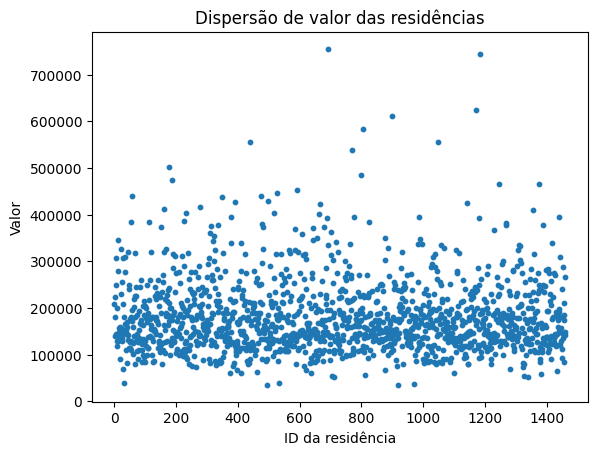

In [4]:
##### Entendendo os valores das casas em um gráfico de dispersão

# Plotar o gráfico de dispersão de valores das casas
x = df_original['Id']
y = df_original['SalePrice']
#cores = np.random.rand(len(x), 3)

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()


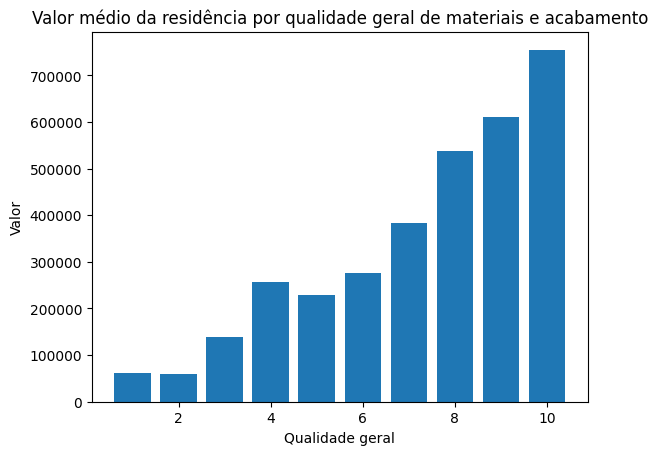

In [5]:
##### Pergunta: Qual o preço médio das casas baseado na sua qualidade de material e acabamento?

# Plotar gráfico de barras de preço em relação a qualidade geral de materiais e acabamento
plt.bar(df_original['OverallQual'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por qualidade geral de materiais e acabamento')
plt.xlabel('Qualidade geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

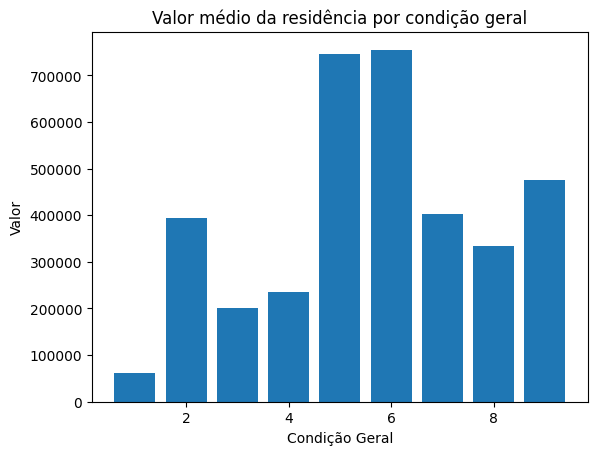

In [6]:
##### Pergunta: Qual o preço médio das casas baseado na sua condição geral?

# Plotar gráfico de barras de preço em relação a condição
plt.bar(df_original['OverallCond'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por condição geral')
plt.xlabel('Condição Geral')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

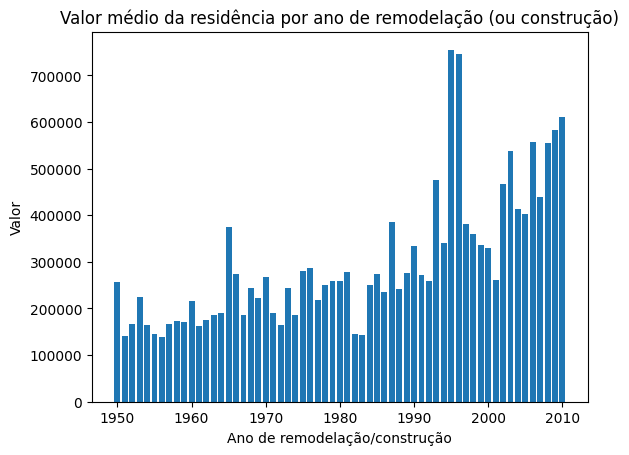

In [7]:
##### Pergunta: Qual o preço médio das casas baseado no ano de remodelação?

# Plotar gráfico de barras de preço em relação ao ano de remodelação (ou construção em casas nunca remodeladas)
plt.bar(df_original['YearRemodAdd'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio da residência por ano de remodelação (ou construção)')
plt.xlabel('Ano de remodelação/construção')
plt.ylabel('Valor')

# Exibição do gráfico
plt.show()

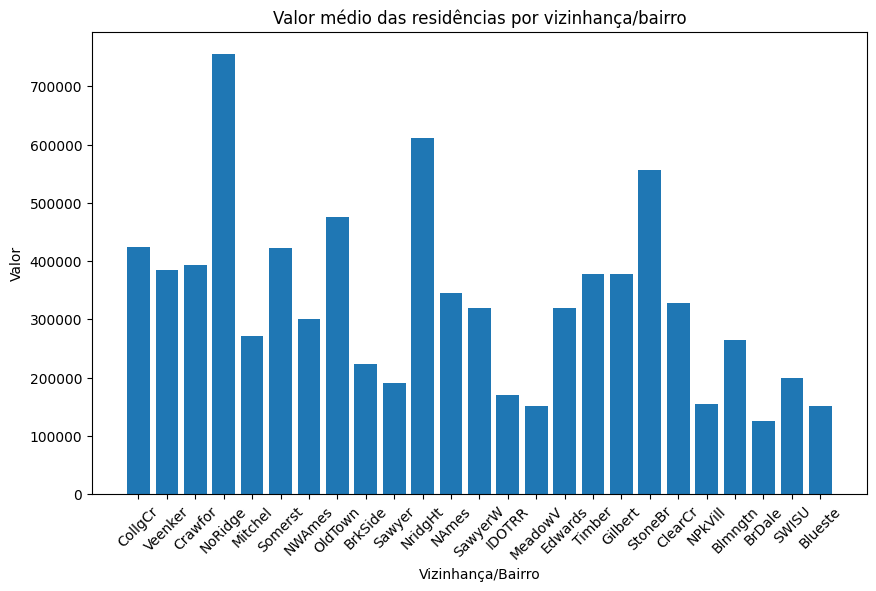

In [8]:
##### Pergunta: Qual o preço médio das casas baseado na sua vizinhança/bairro?

# Aumentar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Plotar gráfico de barras de preço em relação a vizinhança
plt.bar(df_original['Neighborhood'], df_original['SalePrice'])

# Adicionando título e rótulos dos eixos
plt.title('Valor médio das residências por vizinhança/bairro')
plt.xlabel('Vizinhança/Bairro')
plt.ylabel('Valor')

# Rotacionar rótulos do eixo x
plt.xticks(rotation=45)

# Exibição do gráfico
plt.show()

In [9]:
#################################### FEATURING ENGINEERING ####################################

In [15]:
########## Remover casas com valores outliers

# Calcular o intervalo interquartil
Q1 = df_original['SalePrice'].quantile(0.25)
Q3 = df_original['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_cleaned = df_original[(df_original['SalePrice'] >= limite_inferior) & (df_original['SalePrice'] <= limite_superior)]
df_cleaned

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


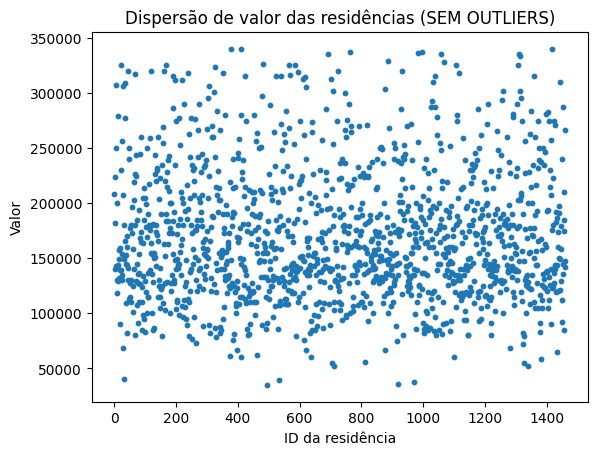

In [11]:
########## Visualizar gráfico de dispersão de valores das casas sem outliers

# Plotar o gráfico de dispersão de valores das casas
x = df_cleaned['Id']
y = df_cleaned['SalePrice']

plt.scatter(x, y, s=10)

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de valor das residências (SEM OUTLIERS)')
plt.xlabel('ID da residência')
plt.ylabel('Valor')
plt.show()

In [12]:
## Aplicar LabelEncoder nos atributos categóricos ## 

df_cleaned_LabelEncoder = df_cleaned.copy(deep=True)

# Identificar as colunas com dados categóricos
colunasAtributosCategoricos = df_cleaned.select_dtypes(include=['object']).columns

# Copiar apenas as colunas categóricas para o novo DataFrame
df_categoricos = df_cleaned[colunasAtributosCategoricos].copy()

# Aplicar o LabelEncoder nas colunas categóricas
label_encoder = LabelEncoder()
for column in colunasAtributosCategoricos:
    df_categoricos[column] = label_encoder.fit_transform(df_categoricos[column])

# Substituir as colunas categóricas em df_cleaned_LabelEncoder
for column in colunasAtributosCategoricos:
    df_cleaned_LabelEncoder[column] = df_categoricos[column]

df_cleaned_LabelEncoder

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [13]:
#################################### APRENDIZAGEM SUPERVISIONADA ####################################

In [18]:
#################### Treinar um modelo de regressão linear múltipla ####################

# Preencher os valores ausentes com a média
df_cleaned_LabelEncoder = df_cleaned_LabelEncoder.fillna(df_cleaned_LabelEncoder.mean())

# Dividir o dataframe em recursos (X) e alvo (y)
X = df_cleaned_LabelEncoder.drop(['SalePrice'], axis=1)
y = df_cleaned_LabelEncoder['SalePrice']

# Treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

# Fazer previsões com o modelo treinado
y_pred = model.predict(X)

# Calcular as métricas de avaliação
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Imprimir as métricas de avaliação
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared (R²): 0.8550094706619848
Mean Absolute Error (MAE): 15412.106930554848
Root Mean Squared Error (RMSE): 22545.363299990953
